# Hands-On 1: **Perceptron**

**Alumno:** Fernando Sinoé Luna García.

**Materia:** Clasificación inteligente de datos.

**Profesor:** Jose Antonio Aviña Mendez


## Fundamentos de la ténica.

Es uno de los modelos más simples de redes neuronales y se le conoce como la neurona artíficial, siendo uno de los pilares fundamentales del deep learning. Su funcionamiento esta basado en el de una neurona biológica.
Tiene cómo principal función clasificar de manera binaria, determinando, por ejemplo, si un tumor es benigno o maligo.

## Modelo Mátematico.
Matemáticamente, el modelo funciona de la siguiente manera:

**Conjunto de entradas:**

> X1, X2, X3 ... Xn

**Peso asociados:**

> W1,W2,W3 ... Wn

Primero, hace un cálculo de una combinación lineal de cada una de las entradas que tenemos.
Posteriormente, le aplica un peso a cada una de estas entradas para finalmente, pasar el resultado a una función de activación.

**Combinación lineal.**

> $$z=w^Tx+b$$

**donde:**

$w$ es el vector de pesos.

$x$ es el de entradas.

$b$ es el bias.

**Activación:**

Nuestro resultado $z$ entra a nuestra función de activación, que es la que decide finalmente si la neurona se activa o no.

$$ f(z) = \begin{cases} 1 & \text{si } z \geq 0 \\ 0 & \text{si } z < 0 \end{cases} $$

## Descripción de la librería, clases, funciones empleadas en programar el Perceptrón

Para la programación del perceptrón opte por lo siguiente:

**Librerías:**

**Sklearn**: Es una biblioteca de python que es muy popular por su uso en la creación de modelos de lenguaje automático. Es de código abierto y gratuito para el análisis de datos y modelos predictivos.
Proporciona herramientas para:
- Clasificación de datos.
- Regresión.
- Agrupamiento (Clustering).
- Preprocesamiento de datos.
- Selección de modelos.

**Numpy**: Es una librería fundamental para el cálculo númerico en python. Especialmente diseñada para trabajar con grandes volúmenes de datos cómo arrays y matrices multidimensionales.










# Pipeline

## Descripción del problema.

Tenemos un dataset de estudiantes que según sus horas de estudio y porcentaje de asistencia escolar, se predecirá si aprobaran o no.

### Featuring Engineering
- **Variables de Entrada (X)**: Son las 'características' o 'señales' que usamos para predecir."
- X1: Horas_Estudio (Numérica continua)
- X2: Asistencia (Numérica continua, representa un porcentaje)

- **Variable de Salida (Y)**: Es la etiqueta o clase que queremos predecir.
- Y: Aprueba (Categórica binaria, 0 = No Aprueba, 1 = Aprueba)

In [2]:
pip install mlxtend

In [15]:
import pandas as pd
import numpy as np

file_path = 'estudiantes_aprobacion.csv' #Preparación de los datos
df = pd.read_csv(file_path)

print("Dataset")
print(df.head(15))
print("\n")

X = df[['Horas_Estudio', 'Asistencia']] #Separamos los datos de entrada
y = df['Aprueba']                          # y salida.

Dataset
    Horas_Estudio  Asistencia  Aprueba
0             1.0          55        0
1             1.5          60        0
2             2.0          70        0
3             2.2          80        0
4             2.8          50        0
5             3.1          75        0
6             3.5          90        0
7             4.0          85        0
8             4.2          95        0
9             5.0          60        0
10            5.5          65        0
11            6.0          70        0
12            6.5          75        0
13            7.0          40        0
14            7.0          90        1




*   ## Model selection
En este caso que estamos etiquetando nuestros datos y solamente tenemos dos clases, ideal para un perceptrón ya que esta diseñado precisamente para casos de clasificación lineal, donde si los patrones se correlacionan correctamente, el perceptrón puede funcionar bien debido a su simplesa.


In [16]:
df.describe()

,Horas_Estudio,Asistencia,Aprueba
count,75.000000,75.000000,75.000000
mean,5.501333,72.413333,0.186667
std,2.809852,17.796214,0.392268
min,1.000000,40.000000,0.000000
25%,2.850000,57.000000,0.000000
50%,5.500000,73.000000,0.000000
75%,7.850000,86.500000,0.000000
max,10.500000,100.000000,1.000000


*   ## Model trainning

Entrenaremos al modelo con las siguientes lineas de código con la función **train_test_split()** la cual nos permite proporcionarle los datos de entrenamiento y de prueba para nuestro modelo clasificador.
Tomando los datos **"X"** ya escalados, y nuestros datos **"Y"** dividiendolos aleatoriamente en dos conjuntos, los datos de prueba y de entrenamiento.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training data: {len(X_train)}, Test data: {len(X_test)}")

scaler = StandardScaler()                     #Escalamos los datos.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ppn = Perceptron(eta0=0.1, random_state=42) #Entrenamos al modelo.
ppn.fit(X_train_scaled, y_train)


Training data: 52, Test data: 23


Perceptron(eta0=0.1, random_state=42)

*   ## Model predicction
Hacemos la predicción y realizó la función para probar que los patrones fueron clasficiados correctamente.

La función itera sobre el conjunto de prueba y muestra la clasificación para cada patrón de entrada.

In [19]:
y_pred = ppn.predict(X_test_scaled) #Obtenemos las predicciones.

def testPatterns(X_test_data, y_test_data, y_pred_data):

    X_test_np = X_test_data.to_numpy()
    y_test_np = y_test_data.to_numpy()

    issues = 0
    for i in range(len(y_test_np)):
        originalPattern = X_test_np[i]
        prediction = y_pred_data[i]
        real = y_test_np[i]

        realClassLabel = "Pass" if real == 1 else "Fail"
        predClassLabel = "Pass" if prediction == 1 else "Fail"

        if prediction == real:
            status = "CORRECT"
        else:
            status = "INCORRECT"
            issues += 1

        print(f"Patt {i}: [Hours: {originalPattern[0]}, Asist: {originalPattern[1]}%]")
        print(f"    -> Prediction: {prediction} ({predClassLabel}) | Real: {real} ({realClassLabel}) - {status}")

    print("-----------------------------------------------------")
    print(f"Test patterns: {len(y_test_np)}")
    print(f"Issues total: {issues}")


testPatterns(X_test, y_test, y_pred)

def predictNew(ppn, hours, asist):
    import numpy as np

    newPattern = np.array([[hours, asist]])
    # importante -> escalar igual que hicimos con X
    newPattern_scaled = scaler.transform(newPattern)
    pred = ppn.predict(newPattern_scaled)[0]

    predLabel = "Pass" if pred == 1 else "Fail"
    print(f"Nuevo patrón -> Hours: {hours}, Asistencia: {asist}% => Predicción: {predLabel}")

predictNew(ppn, 3.7, 78)

predictNew(ppn, 8.7, 78)


Patt 0: [Hours: 2.5, Asist: 75.0%]
    -> Prediction: 0 (Fail) | Real: 0 (Fail) - CORRECT
Patt 1: [Hours: 6.7, Asist: 87.0%]
    -> Prediction: 0 (Fail) | Real: 0 (Fail) - CORRECT
Patt 2: [Hours: 3.9, Asist: 48.0%]
    -> Prediction: 0 (Fail) | Real: 0 (Fail) - CORRECT
Patt 3: [Hours: 8.0, Asist: 85.0%]
    -> Prediction: 1 (Pass) | Real: 1 (Pass) - CORRECT
Patt 4: [Hours: 9.2, Asist: 96.0%]
    -> Prediction: 1 (Pass) | Real: 1 (Pass) - CORRECT
Patt 5: [Hours: 9.2, Asist: 70.0%]
    -> Prediction: 0 (Fail) | Real: 0 (Fail) - CORRECT
Patt 6: [Hours: 3.8, Asist: 63.0%]
    -> Prediction: 0 (Fail) | Real: 0 (Fail) - CORRECT
Patt 7: [Hours: 5.5, Asist: 65.0%]
    -> Prediction: 0 (Fail) | Real: 0 (Fail) - CORRECT
Patt 8: [Hours: 1.2, Asist: 47.0%]
    -> Prediction: 0 (Fail) | Real: 0 (Fail) - CORRECT
Patt 9: [Hours: 7.7, Asist: 54.0%]
    -> Prediction: 0 (Fail) | Real: 0 (Fail) - CORRECT
Patt 10: [Hours: 4.6, Asist: 57.0%]
    -> Prediction: 0 (Fail) | Real: 0 (Fail) - CORRECT
Patt 11: 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



*   ## Model Evaluation

Cómo sabemos, el accuracy es la presición con la que el modelo predició correctamente los datos de entrada. En este caso lo hizo con un valor de 95.6% de precisión, por lo que significa que el modelo clasificó correctamente 0.96 de 100 estudiantes en los datos de entrada.



In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred, target_names=["Reprueba (0)", "Aprueba (1)"]))


Accuracy: 95.65%

--- Reporte de Clasificación Detallado ---
              precision    recall  f1-score   support

Reprueba (0)       1.00      0.95      0.97        19
 Aprueba (1)       0.80      1.00      0.89         4

    accuracy                           0.96        23
   macro avg       0.90      0.97      0.93        23
weighted avg       0.97      0.96      0.96        23



## REPRESENTACIÓN VISUAL

/tmp/ipython-input-2332062264.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 2 len(labels) = 3
  plt.legend(handles=handles, labels=labels, loc='upper left')


Gráfico guardado como 'perceptron_decision_boundary.png'


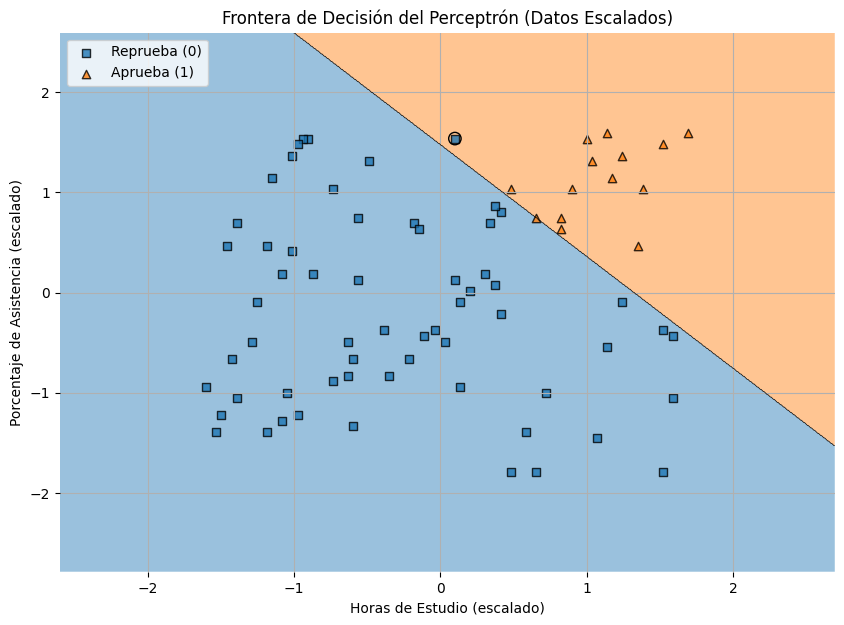

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

X_combined_scaled = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.hstack((y_train, y_test))

X_highlight = X_test_scaled[y_test != y_pred]

plt.figure(figsize=(10, 7))

plot_decision_regions(X=X_combined_scaled,
                      y=y_combined,
                      clf=ppn,
                      legend=2,
                      X_highlight=X_highlight)

plt.title('Frontera de Decisión del Perceptrón (Datos Escalados)')
plt.xlabel('Horas de Estudio (escalado)')
plt.ylabel('Porcentaje de Asistencia (escalado)')

handles, labels = plt.gca().get_legend_handles_labels()
if len(X_highlight) > 0:
    labels = ['Reprueba (0)', 'Aprueba (1)', 'Error de Clasificación']
else:
    labels = ['Reprueba (0)', 'Aprueba (1)']
plt.legend(handles=handles, labels=labels, loc='upper left')

plt.grid(True)

plot_filename = 'perceptron_decision_boundary.png'
plt.savefig(plot_filename)
plt.show()

# REFERENCIAS

Avina Mendez, J. A. (n.d.). Perceptron [Presentación].

Google. (n.d.). Gemini.

Hay, A. (2019a, 25 de abril). Perceptrons: The first stepping stone of deep learning. Alexander Hay. https://alexanderhay2020.github.io/blog/2019/perceptrons/

Hay, A. (2019b). classifier.py [Archivo de código fuente]. GitHub. https://github.com/alexanderhay2020/alexanderhay2020.github.io/blob/master/assets/py/classifier.py

Islam, Md. A. (2022, 16 de diciembre). Perceptron learning algorithm: Feedforward and weight update. Medium. https://arafique906.medium.com/perceptron-learning-algorithm-feedforward-and-weight-update-e2ba1a9bca12

StatQuest with Josh Starmer. (2020, 28 de octubre). Neural Networks Pt. 2: The Perceptron [Video]. YouTube. https://www.youtube.com/watch?v=dkhXGTersP0